<a href="https://colab.research.google.com/github/matejkvassay/colab-notebooks/blob/master/ml_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Found device: {device}')

Found device: cpu


In [18]:
torch.Tensor((10,2))

tensor([10.,  2.])

In [63]:
def uniform_init(*dim, start=0.0, end=1.0, grad=True):
  tensor = torch.zeros(*dim, requires_grad=grad)
  tensor.uniform_(start, end)
  return tensor 

class SigmoidActivation(nn.Module):
  def forward(self, X):
    return 1.0 / (1.0 + torch.exp(-X))

class LinearLayer(nn.Module):
  def __init__(self, input_dim, output_dim, bias=True, w_init=uniform_init,
               grad=True):
    self.W=w_init((input_dim, output_dim), grad=grad)
    self.b = None
    if bias is True:
      self.b=w_init(output_dim, grad=grad)

  def forward(self, X):
    hidden_state = X.mm(self.W)
    if self.b is not None:
      hidden_state = hidden_state + self.b
    return hidden_state

def test_sigmoid_activation():
  act=SigmoidActivation()
  test_array = torch.tensor([0.55, -11.5, 0.001, 0.5,0.2,-0.2])
  exp_res = torch.tensor([0.634136, 0.00001013, 0.50025, 0.622459, 0.549834, 0.450166])
  res = act.forward(test_array)
  assert all(torch.isclose(res, exp_res))

  tensor_shape=(55,12,4)
  test_tensor = torch.rand(tensor_shape)
  res=act.forward(test_tensor)
  assert res.shape==tenshor_shape


def test_uniform_init():
  t = uniform_init((5,10), grad=False)
  assert t.shape == (5,10)
  t=t.flatten()
  assert all(t.flatten() >= 0.0) and all(t.flatten() <= 1.0)

  t = uniform_init((5000,20), start=-1, end=1, grad=False)
  assert t.shape == (5000,20)
  t=t.flatten()
  assert all(t >= -1) and all(t <= 1)
  assert any(t<0)
  
  t = uniform_init(5000, start=-1, end=1, grad=False)
  assert t.shape == (5000,)
  t=t.flatten()
  assert all(t >= -1) and all(t <= 1)

def test_linear_layer_output_shape():
  x_dim = 128
  n_samples = 1352
  out_dim = 32
  X = torch.rand((n_samples, x_dim))
  lin = LinearLayer(x_dim, out_dim, grad=False)
  Z = lin.forward(X)
  assert Z.shape == (n_samples, out_dim)
  print('Test ok.')

test_sigmoid_activation()
test_uniform_init()
test_linear_layer_output_shape()


Test ok.


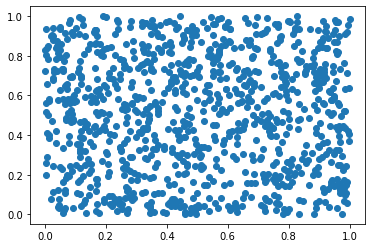

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
W=torch.rand(())
b=torch.rand((1,x_dim))

In [ ]:
x=torch.rand((1, x_dim))

In [ ]:
W=torch.rand((2,2))

In [ ]:
x

tensor([[0.1448, 0.1342]])

In [ ]:
def linear(X, W, b):
  X.T * W + b